# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Carrie Chan

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [62]:
# TODO: Import dataset and inspect the first five columns
df = pd.read_csv('seeds_dataset.txt', sep='\t', header=None)
df.columns = ['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 'length of kernel groove', 'class']
df.iloc[:, :5]

,area,perimeter,compactness,length of kernel,width of kernel
0,15.26,14.84,0.8710,5.763,3.312
1,14.88,14.57,0.8811,5.554,3.333
2,14.29,14.09,0.9050,5.291,3.337
3,13.84,13.94,0.8955,5.324,3.379
4,16.14,14.99,0.9034,5.658,3.562
...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981
206,11.23,12.88,0.8511,5.140,2.795
207,13.20,13.66,0.8883,5.236,3.232
208,11.84,13.21,0.8521,5.175,2.836


Next, you will need to separate the data into your feature matrix and target vector.

In [63]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = df.iloc[:, :7]
y = df['class']

print("The shape of X is: ", X.shape)
print("The shape of y is: ", y.shape)

The shape of X is:  (210, 7)
The shape of y is:  (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*

The features all have real-valued continuous data, but they have different units and scales (e.g., area and perimeter have different units). Standardization would be needed and can be implemented by using StandardScaler. StandardScaler will ensure that each feature has a mean of 0 and a variance of 1.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [64]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [65]:
# TODO: Print the shape of the training feature matrix and target vector

print("The shape of the training feature matrix is: ", X_train.shape)
print("The shape of the training target vector is: ", y_train.shape)

The shape of the training feature matrix is:  (157, 7)
The shape of the training target vector is:  (157,)


Now that we have our training data, we can implement our selected scaler.

In [66]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [67]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [68]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [69]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(scaled_X_train, y_train)

best_params = grid_search.best_params_
results = grid_search.cv_results_
test_score = grid_search.score(scaled_X_test, y_test)

print("Cross validation scores: ", results['mean_test_score'])
print("\nAverage cross validation score: ", results['mean_test_score'].mean())
print("\nBest Parameters for Logistic Regression: ", best_params)
print("\nBest cross-validation score: ", grid_search.best_score_)
print("\nTest set score: ", test_score)

Cross validation scores:  [0.91733871 0.86673387 0.92379032 0.8983871  0.93024194 0.91754032
 0.93689516 0.93024194]

Average cross validation score:  0.9151461693548387

Best Parameters for Logistic Regression:  {'C': 10.0, 'fit_intercept': True}

Best cross-validation score:  0.9368951612903226

Test set score:  0.9622641509433962


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [70]:
# TODO: Predict y labels using best estimator
estimator = grid_search.best_estimator_
y_pred = estimator.predict(scaled_X_test)

In [71]:
# TODO: Reduce dimensions of test data for plotting
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 
X_pca = pca.fit_transform(scaled_X_test)

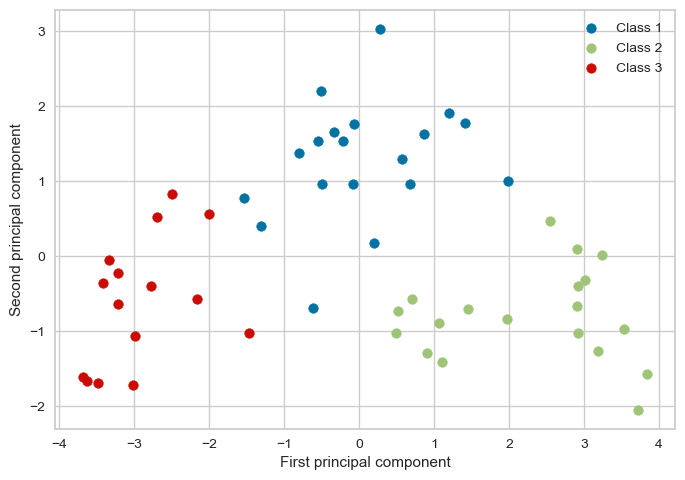

In [72]:
# TODO: Plot test points colored by predicted label
plt.figure(figsize=(8, 8)) 

for class_val in np.unique(y_pred):
    plt.scatter(
        X_pca[y_pred == class_val, 0],
        X_pca[y_pred == class_val, 1],
        label=f'Class {class_val}'
    )
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend()
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

1. The logistic regression model worked well for this dataset. Both the cross-validation score (best validation score = 0.9369) and test score (test score = 0.9623) are high and close to the maximum score of 1, which indicates that the model is a good fit. The training and test scores are also relatively close together in value, indicating low variance. 
2. PCA worked well for this model since the different classes are clearly defined and distinctive in the plot. The logistic regression scores indicated high performance from the model (linear model can identify the different classes well) and PCA (a linear method) showed good separation between the classes, therefore there is a high indication that the dataset is linear.

Source: https://machinelearningmastery.com/principal-component-analysis-for-visualization/

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. The code was sourced from the lab and course examples.
2. The steps were completed in chronological order.
3. Generative AI was used to troubleshoot the code for step 5. Instead of using range(3) (similar to the code in lab 8), the code was changed to np.unique(y_pred) to ensure each point represents a class of wheat kernel. The prompt used was: "How to solve the error with matching the class label to the data points".
4. There were some challenges in understanding how to use PCA, however the labs and course examples provided good guidance on this question. 

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [73]:
# TODO: Scale feature matrix
scaler = StandardScaler()
df_scaled = X.copy()
scaler.fit(df_scaled)
df_scaled = pd.DataFrame(scaler.transform(df_scaled), columns=df_scaled.columns)
df_scaled

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356
...,...,...,...,...,...,...,...
205,-0.915515,-1.043321,0.309736,-1.112048,-0.736716,-0.046135,-1.097413
206,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156
207,-0.567571,-0.690247,0.733948,-0.888070,-0.070604,3.076588,-0.718060
208,-1.036090,-1.035645,-0.801701,-1.026077,-1.121521,-0.068135,-0.742535


The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

C:\Users\carri\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\carri\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\carri\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\carri\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to ha

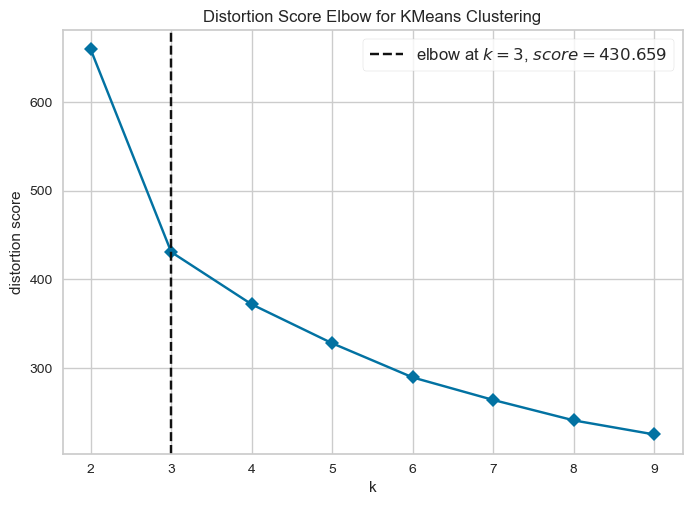

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(2, 10),
                 timings=False)

In [74]:
# TODO: Use the elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=0), df_scaled, k=(2,10), 
                  metric='distortion',
                 timings=False)

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [75]:
# TODO: Implement K-means with the number of clusters determined in the previous step
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_scaled)
labels = kmeans.labels_

C:\Users\carri\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\carri\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [76]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette = silhouette_score(df_scaled, labels)
calinski_h = calinski_harabasz_score(df_scaled, labels)
davies_b = davies_bouldin_score(df_scaled, labels)

print('Silhouette score: ', silhouette)
print('Calinski-Harabasz score: ', calinski_h)
print('Davies-Bouldin score: ', davies_b)

Silhouette score:  0.4007270552751298
Calinski-Harabasz score:  249.7841749161647
Davies-Bouldin score:  0.9278712249013426


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

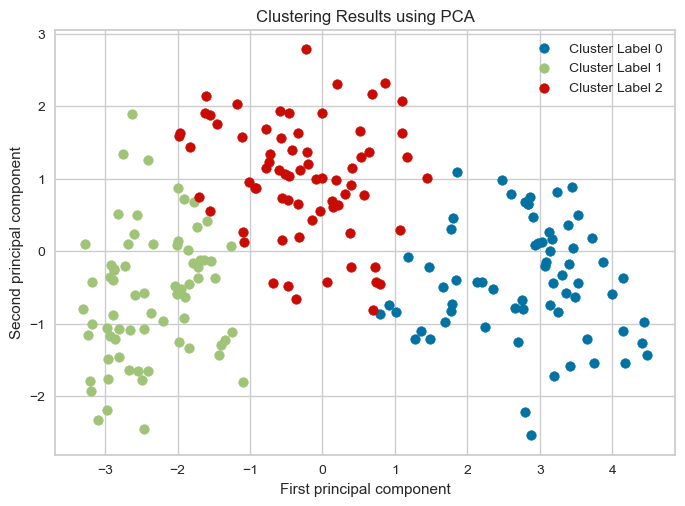

In [77]:
# TODO: Plot clustering results
pca = PCA(n_components=2)
df_scaled_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 8)) 

for cluster_label in range(3):
    plt.scatter(
        df_scaled_pca[labels == cluster_label, 0],
        df_scaled_pca[labels == cluster_label, 1],
        label=f'Cluster Label {cluster_label}'
    )
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title('Clustering Results using PCA')
plt.legend()
plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

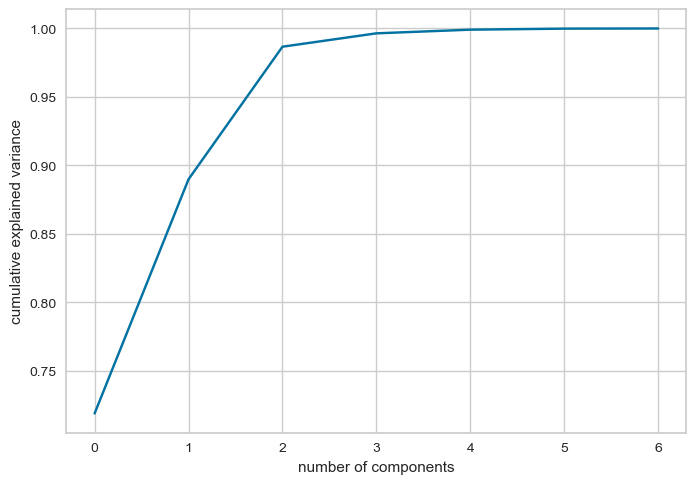

In [78]:
# TODO: Find the number of principal components using explained variance ratio
pca = PCA()
pca.fit(df_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# graph shows that 2 components are needed to explain at least 95% of the variance

Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [79]:
# TODO: Use PCA to transform the data
pca = PCA(n_components=2)
df_scaled_pca2 = pca.fit_transform(df_scaled)

In [80]:
# TODO: Implement K-means with the transformed data
kmeans2 = KMeans(n_clusters=3, random_state=0)
kmeans2.fit(df_scaled_pca2)
labels2 = kmeans2.labels_

C:\Users\carri\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\carri\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [81]:
# TODO: Calculate the three different validation metrics
silhouette2 = silhouette_score(df_scaled_pca2, labels2)
calinski_h_2 = calinski_harabasz_score(df_scaled_pca2, labels2)
davies_b_2 = davies_bouldin_score(df_scaled_pca2, labels2)

print('Silhouette score: ', silhouette2)
print('Calinski-Harabasz score: ', calinski_h_2)
print('Davies-Bouldin score: ', davies_b_2)

Silhouette score:  0.49343048696031916
Calinski-Harabasz score:  397.30107838636803
Davies-Bouldin score:  0.70667347579798


### Step 3: Display results (2 marks)

Print the results for Steps 1 and 2 in a table. Include column and row labels

In [82]:
# TODO: Display results
results = pd.DataFrame(index = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score'], columns=['Without_PCA', 'With_PCA'])
results.loc['Silhouette score'] = [silhouette, silhouette2]
results.loc['Calinski-Harabasz score'] = [calinski_h, calinski_h_2]
results.loc['Davies-Bouldin score'] = [davies_b, davies_b_2]
print(results)

                        Without_PCA    With_PCA
Silhouette score           0.400727     0.49343
Calinski-Harabasz score  249.784175  397.301078
Davies-Bouldin score       0.927871    0.706673


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*
1. The optimal number of clusters obtained was 3 and made sense in this context since there are three classes of wheat kernels in the dataset.
2. The PCA plot from part 2 and the PCA plot from plot 1 were similar in terms of the grouping of each cluster. The plot from part 2 shows some overlap between some points of different labels, however the overall positioning of the points and each cluster in plot 2 were very similar to plot 1. 
3. 2 components were used for the PCA analysis. Using PCA improved the results since the Silhouette and Calinsky-Harabasz scores increased, indicating that the clusters are more dense and better separated while using PCA. The decrease in the Davis-Bouldin score indicates that there is a better partition while using PCA (values closer to zero indicate a better partition - from class notes). 

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. The code was sourced from the lab and course examples.
2. The steps were completed in chronological order.
3. Generative AI was not used for this part of the assignment. Labs, course examples, and past assignments were referenced.
4. There was not much challenge in completing this part of the assignment since the sources (as stated above) used provided good guidance and applicable code. 

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I liked that this assignment helped me understand PCA and clustering better by applying theory learned in class. At first the theory behind PCA and how to apply it was confusing, however after finishing the assignment, this became more clear.  